In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=df14eafb9a20d4aef5f4c487e8afdcaf3be008118da735a7acf56191f39ae543
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=7bbf4f63aaa5387db6826fc8e8b5cbf1906c72f42bc4456dc41fa000e4d0a7d4
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import yfinance as yf
import pandas as pd

In [4]:
NIFTY = yf.download(tickers='^NSEI', period = '10y', interval = '1d')['Adj Close']
NIFTY.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-07-25    5680.299805
2011-07-26    5574.850098
2011-07-27    5546.799805
2011-07-28    5487.750000
2011-07-29    5482.000000
Name: Adj Close, dtype: float64

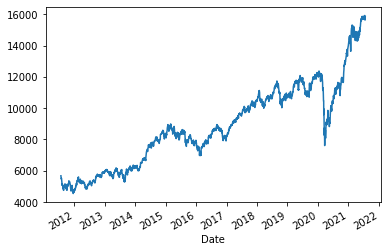

In [5]:
import matplotlib.pyplot as plt
NIFTY.plot()
plt.show()

In [6]:
pip install Prophet

     |████████████████████████████████| 65 kB 738 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.8 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644402 sha256=198a4b6fd7b663be59de231c03a49ceecb6862bcfbf0c736b84dac65e7e56868
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
NIFTY_price = yf.download(tickers='^NSEI', period = '20y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [8]:
modelfb = Prophet()
NIFTY_price = NIFTY_price.reset_index()
NIFTY_price[['ds','y']] = NIFTY_price[['Date','Adj Close']]
modelfb.fit(NIFTY_price)
future = modelfb.make_future_dataframe(periods=180)


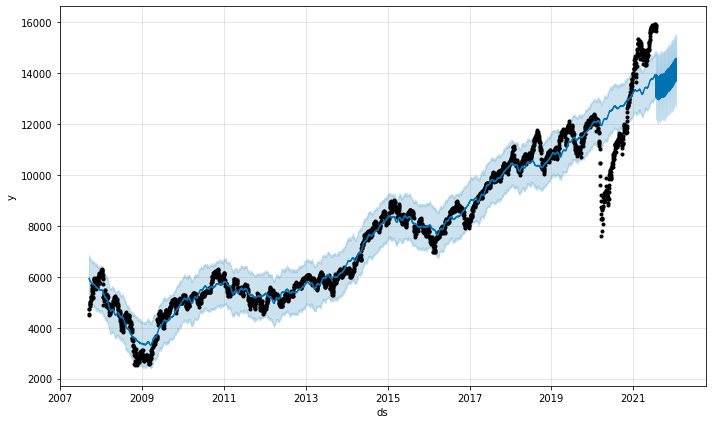

In [9]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [10]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()